In [11]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns

In [60]:
input_dir = Path("/home/matt.davis/dff-metrics-def9-delete")

genotype = ["oi1","oi3", "ai195"]

dfs = []
for g in genotype:
    csv_list = list((input_dir/g).glob(f"*.csv"))
    
    for csv in csv_list:
        df = pd.read_csv(csv)
        oeid = csv.stem.split("_")[0]

        df['oeid'] = oeid
        df['genotype'] = g

        dfs.append(df)

df = pd.concat(dfs)


Text(0.5, 1.0, 'Number of cells')

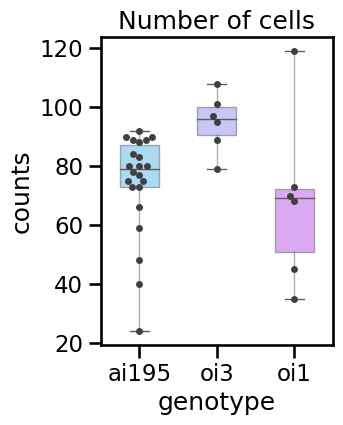

In [61]:
# groupby oeids and genotypes and get just the count of the number of rows, no other columns
count_df = df.groupby(['oeid','genotype']).size().reset_index(name='counts')

# plot counts by genotype, with a boxplot and swarmplot
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(3, 4))
# make box skinny, cmap blue/purple, transparency 0.5, line color gray
sns.boxplot(data=count_df, x='genotype', y='counts', whis=np.inf, linewidth=1, width=.5, 
             showfliers=False, palette="cool", ax=ax, boxprops=dict(alpha=0.5), whiskerprops=dict(alpha=0.5))


sns.swarmplot(data=count_df, x='genotype', y='counts', color=".25")

# title "Number of cells"
ax.set_title("Number of cells")

/data/learning/mattd/miniconda3/envs/dev/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


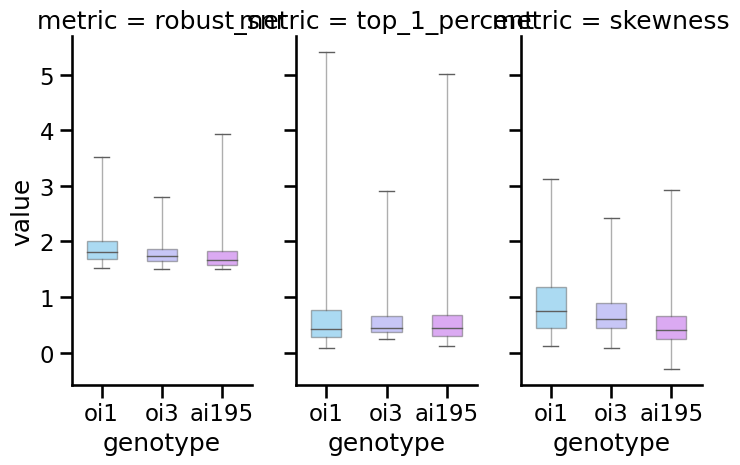

In [63]:
# do a facet box plot, color=genotype, of with seaborn robust_snr, top_1_percent, and skewness, make kde + rug
sns.set_context("talk")
# make plot_df, with just the columns we want to plot in one column
plot_df = df.melt(id_vars=['oeid','genotype'], value_vars=['robust_snr','top_1_percent','skewness'], var_name='metric')
g = sns.catplot(data=plot_df, x='genotype', y='value', col="metric", kind='box', palette="cool", aspect=.5, showfliers=False, 
            whis=np.inf, linewidth=1, width=.5, boxprops=dict(alpha=0.5), whiskerprops=dict(alpha=0.5))

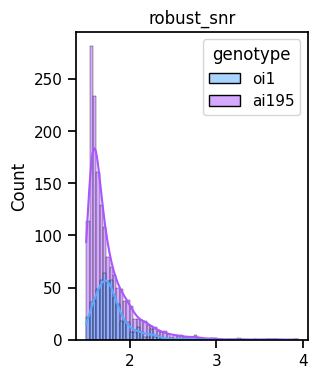

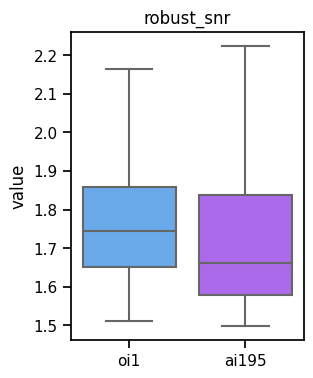

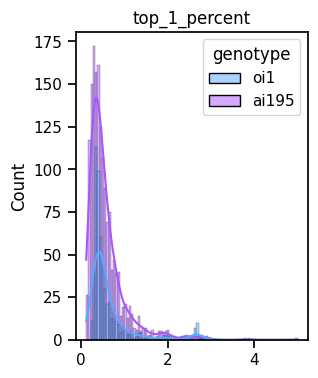

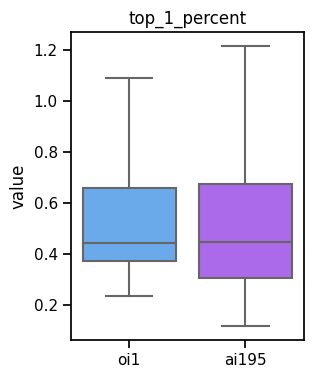

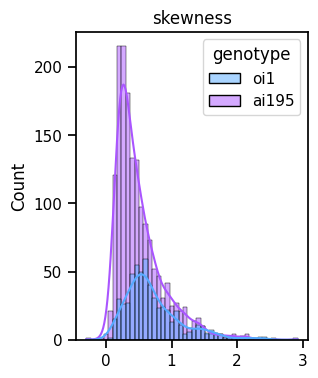

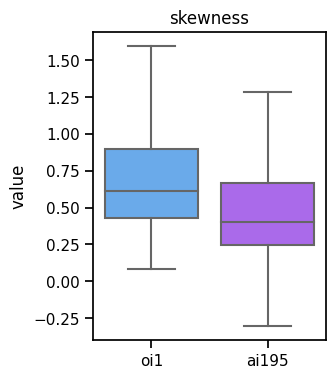

In [58]:
sns.set_context("notebook")

# for each metric, plot the distribution of each genotype on the same plot
for metric in ['robust_snr','top_1_percent','skewness']:
    fig, ax = plt.subplots(figsize=(3, 4))
    sns.histplot(data=plot_df[plot_df['metric'] == metric], x='value', hue='genotype', kde=True, common_norm=False, palette="cool", ax=ax)
    ax.set_title(metric)
    ax.set_xlabel('')

    # do a the same with boxplot
    fig, ax = plt.subplots(figsize=(3, 4))
    sns.boxplot(data=plot_df[plot_df['metric'] == metric], x='genotype', y='value', palette="cool", ax=ax, showfliers=False)
    ax.set_title(metric)
    ax.set_xlabel('')

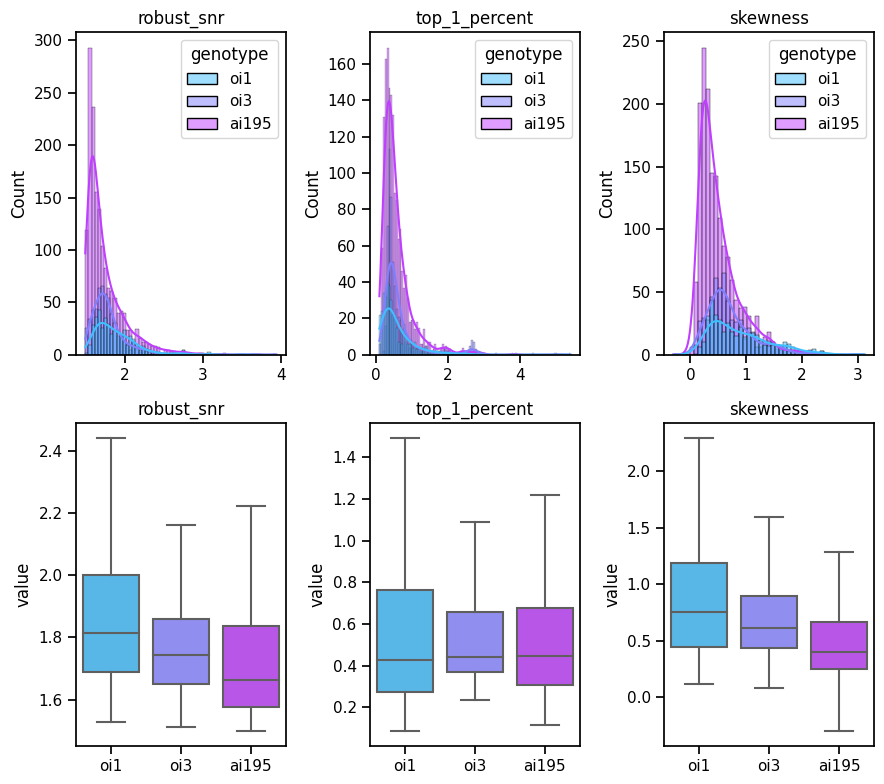

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")

metrics = ['robust_snr', 'top_1_percent', 'skewness']

# Create a figure with 2 rows (for histogram and boxplot) and 3 columns (for each metric)
fig, axs = plt.subplots(2, len(metrics), figsize=(9, 8))

for i, metric in enumerate(metrics):
    # Histograms on the first row, normalize the counts to make them a fraction of the total counts
    sns.histplot(data=plot_df[plot_df['metric'] == metric], x='value', hue='genotype', kde=True, common_norm=False, palette="cool", ax=axs[0, i])

    axs[0, i].set_title(metric)
    axs[0, i].set_xlabel('')

    # Boxplots on the second row
    sns.boxplot(data=plot_df[plot_df['metric'] == metric], x='genotype', y='value', palette="cool", ax=axs[1, i], showfliers=False)
    axs[1, i].set_title(metric)
    axs[1, i].set_xlabel('')

plt.tight_layout()
plt.show()